In [2]:
import numpy as np 
import scipy
import matplotlib.pyplot as plt 
import pandas as pd 

In [3]:
def grad_desc_1d(x0, f, grad, step, max_step=100, tol = 1e-6):
    all_x_i = [x0]
    all_f_i = [f(x0)]
    x_i = x0
    try:
        for i in range(max_step):
            dx_i = grad(x_i)
            x_i = x_i - dx_i * step
            f_x_i = f(x_i)
            all_x_i.append(x_i)
            all_f_i.append(f_x_i)
            if np.abs(dx_i) < tol:
                break
    except OverflowError as err:
        print(f"{type(err).__name__}: {err}")
    if len(all_x_i) == max_step+1:
        print("Warning - Failed to converge!")
    return all_x_i, all_f_i

In [4]:
f = lambda x: x**2
grad = lambda x: 2*x

In [7]:
def plot_1d_traj( x_min, x_max, f, opt) : 
    x = np.linspace(x_min, x_max, 100) 
    plt.plot(x, f(x), label=r"$f(x)$")
    
    plt.xlim((x_min-0.2, x_max+0.2))
    plt.ylim((min(f(x))-0.2, max(f(x))+0.2))
    plt.xlabel(r"$x$")
    plt.ylabel(r"$f(x)$")
    plt.plot(opt[0], opt[1], "r->", label=r"$f(x_k + \alpha p_k)$")
    plt.legend()

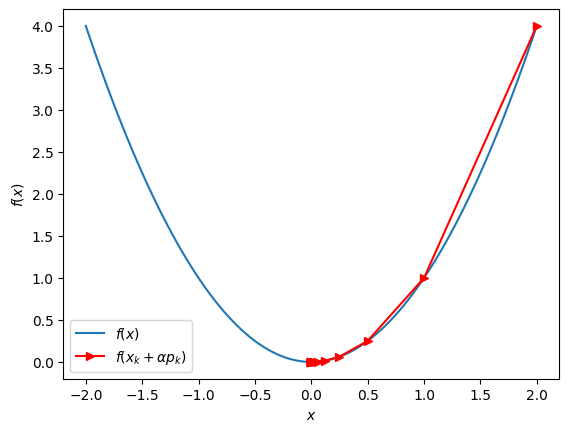

In [9]:
opt = grad_desc_1d(2., f, grad, step=0.25)
plot_1d_traj(-2, 2, f, opt )
plt.savefig("../images/gd1.pdf")

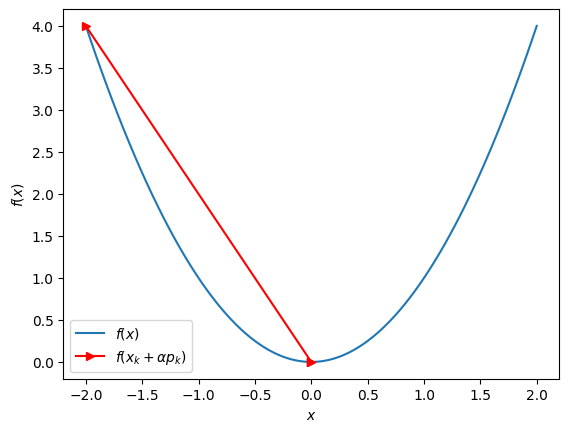

In [10]:
opt = grad_desc_1d(-2, f, grad, step=0.5)
plot_1d_traj(-2, 2, f, opt )
plt.savefig("../images/gd2.pdf")

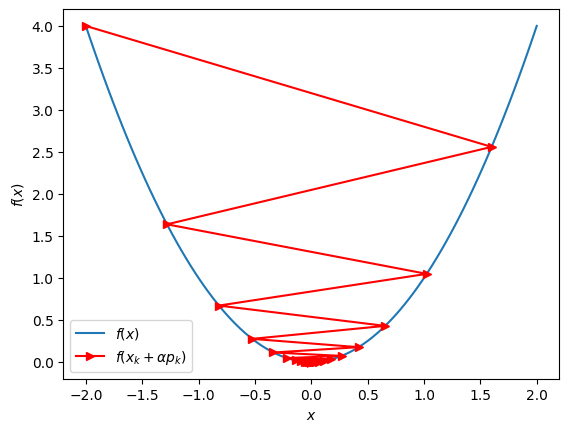

In [11]:
opt = grad_desc_1d(-2, f, grad, step=0.9)
plot_1d_traj(-2,2, f, opt )
plt.savefig("../images/gd3.pdf")

In [12]:
opt = grad_desc_1d(-2, f, grad, step=1)


Warning - Failed to converge!


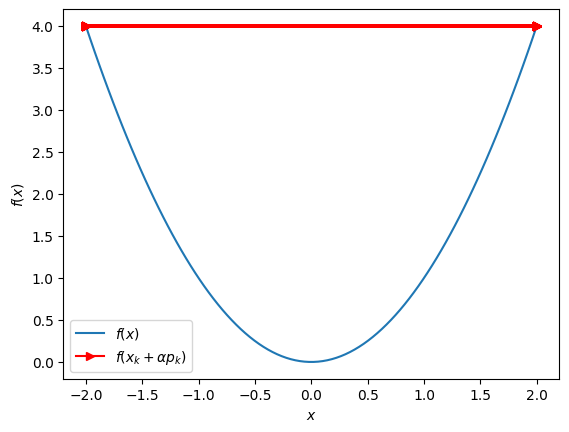

In [13]:
plot_1d_traj(-2,2, f, opt )
plt.savefig("../images/gd4.pdf")

In [14]:
f2 = lambda x: x**4 + x**3 - x**2 - x 
grad2 = lambda x: 4*x**3 + 3*x**2 - 2*x - 1

## by solving the equation f'(x) = 0, we obtain the exact set of extrema which are
## x_1 = -1, x_2 = (1 +sqrt(17))/8, x_3 = -(1 +sqrt(17))/8
## we can then plot them to see 
x_1 = -1 
x_2 = (1 +np.sqrt(17))/8
x_3 = -(1 +np.sqrt(17))/8

In [15]:
x_inf = (-3 + np.sqrt(33))/12.
x_inf 

0.22871355387816905

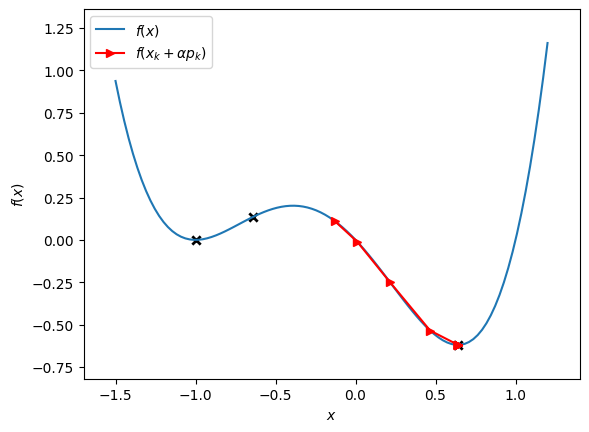

In [18]:
opt2 = grad_desc_1d(-x_inf+0.1, f2, grad2, step=0.2)
plot_1d_traj(-1.5, 1.2, f2, opt2)
plt.scatter([x_1, x_2, x_3], [f2(x_1), f2(x_2), f2(x_3)], color="black", linewidth=2, marker='x')
plt.savefig("../images/gd5.pdf")

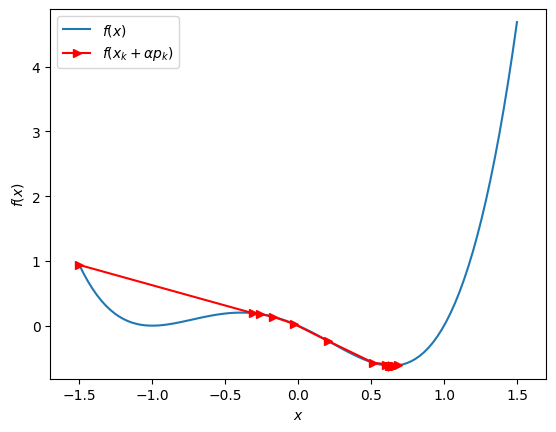

In [19]:
opt2= grad_desc_1d(-1.5, f2, grad2, step=0.25)
plot_1d_traj(-1.5, 1.5, f2, opt2)
plt.savefig("../images/gd6.pdf")

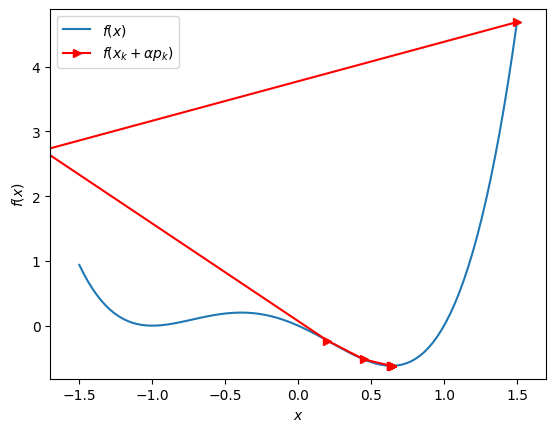

In [20]:
opt2 = grad_desc_1d(1.5, f2, grad2, step=0.2)
plot_1d_traj(-1.5, 1.5, f2, opt2 )
plt.savefig("../images/gd7.pdf")

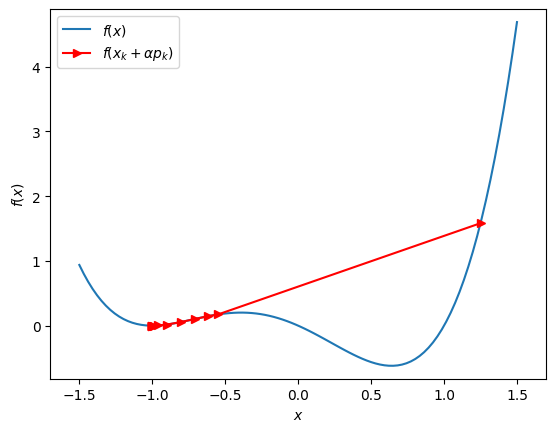

In [21]:
opt2 = grad_desc_1d(1.25, f2, grad2, step=0.2)
plot_1d_traj(-1.5, 1.5, f2, opt2)
plt.savefig("../images/gd8.pdf")

OverflowError: (34, 'Result too large')


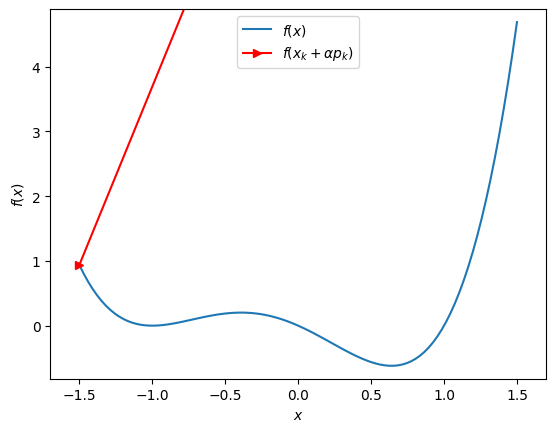

In [22]:
opt2 = grad_desc_1d(-1.5, f2, grad2, step=0.75)
plot_1d_traj(-1.5, 1.5, f2, opt2 )
plt.savefig("../images/gd9.pdf")

In [24]:
opt2

([-1.5,
  2.0625,
  -29.986083984375,
  78789.99556875888,
  -1467366557235808.0,
  9.478445237313853e+45],
 [0.9375,
  20.552993774414062,
  780666.4923959533,
  3.853805712579921e+19,
  4.636117851941789e+60,
  8.071391646153008e+183])

OverflowError: (34, 'Result too large')


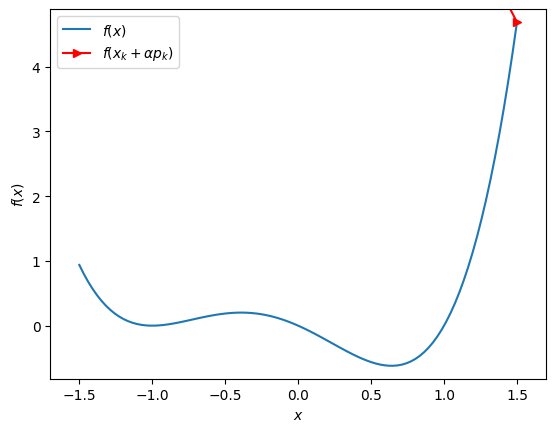

In [25]:
opt2 = grad_desc_1d(1.5, f2, grad2, step=0.25)
plot_1d_traj(-1.5, 1.5, f2, opt2)
plt.savefig("../images/gd10.pdf")

In [26]:
def grad_desc_1d_bt(x, f, grad, step, tau=0.5, max_step=100, max_back=10, tol = 1e-6):
    all_x_i = [x]
    all_f_i = [f(x)]
    try:
        for i in range(max_step):
            dx = grad(x)
            for j in range(max_back):
                new_x = x + step * (-dx)
                new_f_x = f(new_x)

                if (new_f_x < all_f_i[-1]):
                    break

                step = step * tau
            x = new_x
            f_x = new_f_x
            all_x_i.append(x)
            all_f_i.append(f_x)
            if np.abs(dx) < tol:
                break
    except OverflowError as err:
        print(f"{type(err).__name__}: {err}")
    
    if len(all_x_i) == max_step+1:
        print("Warning - Failed to converge!")
    return all_x_i, all_f_i

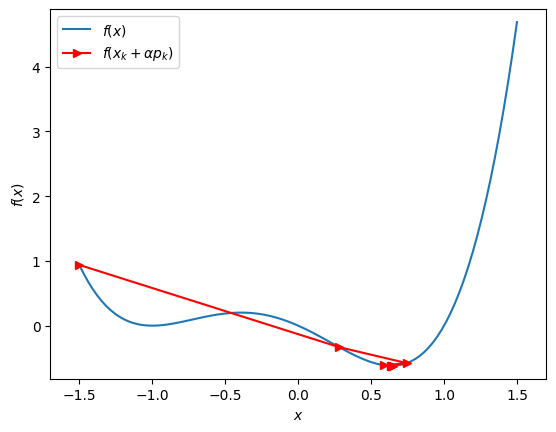

In [27]:
opt2 = grad_desc_1d_bt(-1.5, f2, grad2, step=0.75, tau=0.5)
plot_1d_traj(-1.5, 1.5, f2, opt2) 

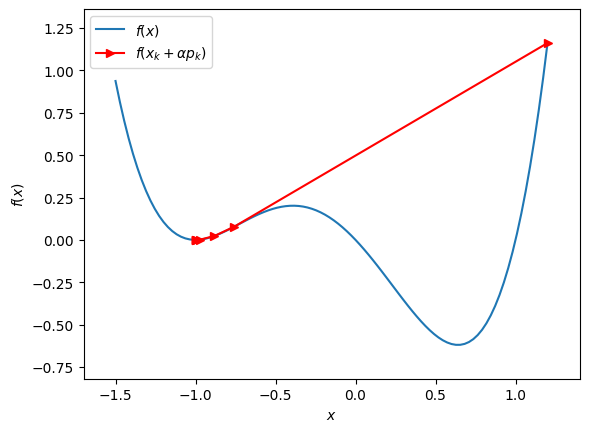

In [30]:
opt2 = grad_desc_1d_bt(1.2, f2, grad2, step=0.25, tau=0.5)
plot_1d_traj(-1.5, 1.2, f2, opt2)

In [69]:
def newtons_method(x0, f, grad, hess, max_iter=100, max_back=10, tol=1e-8):
    all_x_i = [x0]
    all_f_i = [f(x0)]
    x_i = x0
    for i in range(max_iter):
        g_i = grad(x_i)
        step = - g_i/hess(x_i)
        for j in range(max_back):
            new_x_i = x_i + step
            new_f_i = f(new_x_i)
            if (new_f_i < all_f_i[-1]):
                break
            step /=2
        x_i, f_i = new_x_i, new_f_i
        all_x_i.append(x_i)
        all_f_i.append(f_i)
        if np.sqrt(np.sum(g_i**2)) < tol:
            break
    return all_x_i, all_f_i

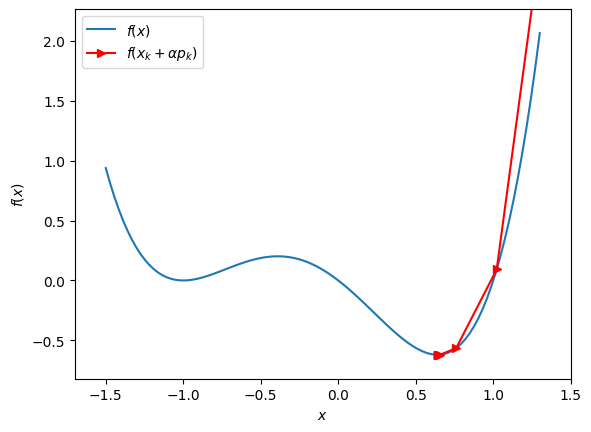

In [70]:
f2 = lambda x: x**4 + x**3 - x**2 - x 
grad2 = lambda x: 4*x**3 + 3*x**2 - 2*x - 1

hess = lambda x: 12*x**2 + 6*x -2

rst_newton = newtons_method(1.5, f2, grad2, hess)
plot_1d_traj(-1.5, 1.3, f2, rst_newton)

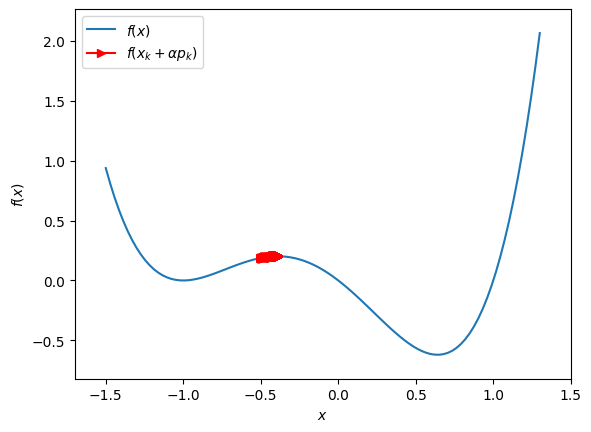

In [75]:
rst_newton = newtons_method(-0.5, f2, grad2, hess, max_iter=100000)
plot_1d_traj(-1.5, 1.3, f2, rst_newton)

In [76]:
rst_newton

([-0.5,
  -0.499755859375,
  -0.4995123740086557,
  -0.499269541362422,
  -0.4990273589135763,
  -0.49878582415507217,
  -0.4985449345953943,
  -0.49830468775841547,
  -0.49806508118325515,
  -0.4978261124241399,
  -0.49758777905026524,
  -0.49735007864565967,
  -0.49711300880904963,
  -0.49687656715372674,
  -0.4966407513074162,
  -0.49640555891214694,
  -0.4961709876241232,
  -0.4959370351135979,
  -0.4957036990647469,
  -0.4954709771755458,
  -0.4952388671576468,
  -0.49500736673625834,
  -0.4947764736500252,
  -0.49454618565091046,
  -0.4943165005040788,
  -0.49408741598778094,
  -0.49385892989323954,
  -0.49363104002453656,
  -0.4934037441985017,
  -0.4931770402446022,
  -0.49295092600483387,
  -0.49272539933361353,
  -0.49250045809767234,
  -0.49227610017595064,
  -0.49205232345949396,
  -0.49182912585134997,
  -0.4916065052664668,
  -0.4913844596315926,
  -0.4911629868851758,
  -0.4909420849772668,
  -0.4907217518694211,
  -0.49050198553460245,
  -0.49028278395708835,
  -0.49006